#### 통계이해하기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. 통계분석개요
- 모집단(population): 연구 대상 데이터 전체 집합
- 모수(parameter) : 모집단의 특성을 나타내는 수치
- 표본(sample) : 모집단에서 추출한 일부 데이터
- 통계량(statistic) : 표본의 특성을 나타내는 수치
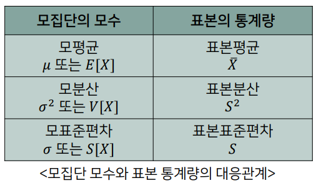

In [3]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Delta Degree of Freedom(ddof-1), 자유도, pandas는 표본기준 작업
print('표본평균:', s.mean())
print('표본분산:', s.var())
print('표본표준편차:', s.std())
print('모분산:', s.var(ddof=0))
print('모표준편차:', s.std(ddof=0))

표본평균: 5.5
표본분산: 9.166666666666666
표본표준편차: 3.0276503540974917
모분산: 8.25
모표준편차: 2.8722813232690143


In [4]:
# numpy는 모집단 기준 작업
s = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
s = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('평균:', s.mean())
print('표본분산:', s.var(ddof=1)) # 자유도 설정해야함
print('표본표준편차:', s.std(ddof=1))
print('모분산:', s.var())
print('모표준편차:', s.std())

평균: 5.5
표본분산: 9.166666666666666
표본표준편차: 3.0276503540974917
모분산: 8.25
모표준편차: 2.8722813232690143


#### 2.표본추출

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.shape

(244, 7)

In [9]:
# 단순무작위추출, 비율사용
tips.sample(frac=0.02,random_state=1) #random_state -> 일정한 순서로 추출

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


In [10]:
tips.sample(n=5,random_state=1)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2


In [13]:
# 계통추출, 일정 간격으로 추출
tips.iloc[range(1,len(tips),50),:] #50개마다 1개씩 추출

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
51,10.29,2.60,Female,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
151,13.13,2.00,Male,No,Sun,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2


In [23]:
# 층화추출 성별 기준으로 성비 맞게 10개 추출 7:3, 6:4 등
sample_n = 10
temp = tips['sex'].value_counts(normalize=True).to_frame() # 비율로 확인
temp.columns=['rate']
temp['sample_n'] = round(sample_n * temp['rate'],0).astype('int')
temp

,rate,sample_n
Male,0.643443,6
Female,0.356557,4


In [27]:
Female = tips.loc[tips['sex']=='Female',:]
Male = tips.loc[tips['sex']=='Male',:]
df1 = Female.sample(n=temp.loc['Female','sample_n'],random_state=1)
df2 = Male.sample(n=temp.loc['Male','sample_n'],random_state=1)

In [29]:
df = pd.concat([df1,df2])
df = df.sample(frac=1,random_state=123)
df

,total_bill,tip,sex,smoker,day,time,size
182,45.35,3.50,Male,Yes,Sun,Dinner,3
121,13.42,1.68,Female,No,Thur,Lunch,2
43,9.68,1.32,Male,No,Sun,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
47,32.40,6.00,Male,No,Sun,Dinner,4
125,29.80,4.20,Female,No,Thur,Lunch,6
132,11.17,1.50,Female,No,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2
54,25.56,4.34,Male,No,Sun,Dinner,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2


#### 3. 이상치
- 일반적인 값들과 많이 떨어진 위치의 데이터
- 평균은 이상치에 영향을 크게 받지만, 중앙값은 영향을 거의 받지 않음

In [30]:
import pandas as pd
data1 = [10,20,30,40,50]
data2 = [10,20,30,40,200]
a = pd.Series(data1)
b = pd.Series(data2)
print('평균  ', a.mean(), b.mean()) #data2 평균이 큰 것 확인
print('중앙값', a.median(), b.median()) #중앙값은 동일

평균   30.0 60.0
중앙값 30.0 30.0


In [32]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


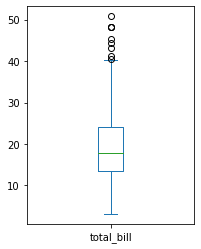

In [34]:
# 이상치 확인하는 시각화
tips['total_bill'].plot.box(figsize=(3,4))
plt.show()

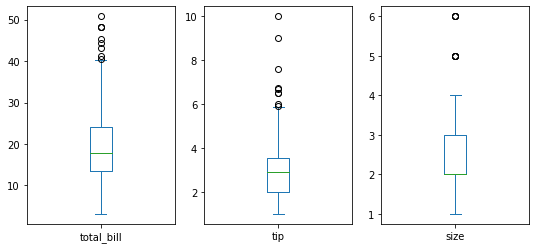

In [37]:
tips.plot(kind='box',subplots=True,figsize=(9,4))
plt.show()

In [41]:
#ESD(Extream Studentized Diviate)
s = tips['tip']
s_mean,s_std = s.mean(),s.std()
e_lower = round(s_mean - 3*s_std,2)
e_upper = round(s_mean + 3*s_std,2)
print(f'Lower:{e_lower},Upper:{e_upper}')

Lower:-1.15,Upper:7.15


In [42]:
# IQR, 사분위수 
s = tips['tip']
Q1, Q3 = s.quantile([0.25,0.75])
IQR = Q3 - Q1
q_lower = Q1 - 1.5*IQR
q_upper = Q3 + 1.5*IQR
print(f'Lower:{q_lower},Upper:{q_upper}')

Lower:-0.34375,Upper:5.90625


In [43]:
# 이상치 처리

In [47]:
# 이상치 제거 - 정상범주에 있는 데이터를 indexing 하는 방법(q_lower,q_upper 사이에 있는 값이 정상)
tips2 = tips[(tips['tip'] > q_lower) &(tips['tip'] < q_upper)]
print(tips.shape, tips2.shape) #9개 데이터 제거

(244, 7) (235, 7)


In [50]:
tips_outlier = tips[(tips['tip'] <= q_lower)|(tips['tip'] >= q_upper)]
tips_outlier

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [51]:
# 이상치 대체
tips3 = tips.copy()
tips3.loc[tips3['tip']>q_upper,'tip'] = q_upper
tips3.loc[tips3['tip']<q_lower,'tip'] = q_lower
tips3.loc[(tips3['tip']>q_upper)|(tips3['tip']<q_lower)]

,total_bill,tip,sex,smoker,day,time,size


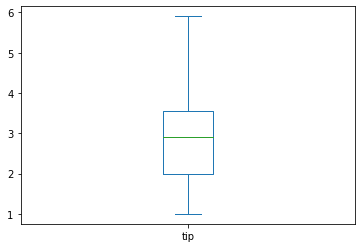

In [52]:
tips3['tip'].plot.box()
plt.show()

####  4.데이터변환
- 이상치를 완화하거나, 정규분포가 되도록 하기 위해 사용함
- numpy의 log1p, sqrt, expm1, power 등의 함수 사용
    - log1p, sqrt 는 큰 값을 작게 만들어 주며, 오른쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용, 큰 이상치를 작게 만들 수 있음
    - expm1, power는 작은 값을 크게 만들어 주며, 왼쪽 꼬리가 긴 분포를 정규분포로 변환하는데 사용함

In [53]:
tips = sns.load_dataset('tips')

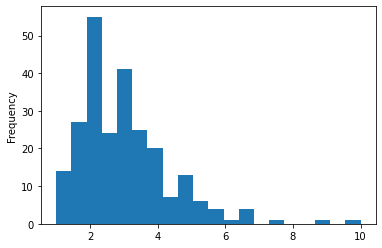

In [61]:
# 오른쪽이 긴 형태로 나옴
s = tips['tip']
s.plot.hist(bins = 20)
plt.show()

In [59]:
print(np.log10(100),np.power(10,2)) #10^? = 100 일까
print(np.e,np.log(100),np.power(np.e,4.605170185988092))

2.0 100
2.718281828459045 4.605170185988092 100.00000000000001


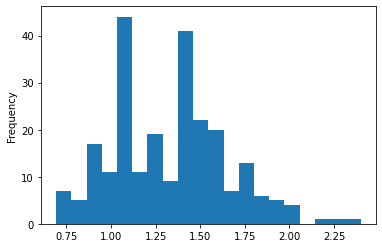

In [60]:
# 정규분포 모양을 닮아감
s = np.log1p(tips['tip'])
s.plot.hist(bins=20)
plt.show()

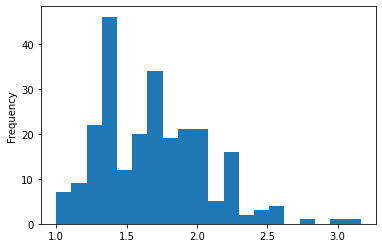

In [62]:
s = np.sqrt(tips['tip'])
s.plot.hist(bins=20)
plt.show()

In [64]:
# 원본 데이터로 변환
a = tips['tip']
b = np.log1p(a)
c = np.expm1(b)
print(a[:3],b[:3],c[:3],sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    0.698135
1    0.978326
2    1.504077
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


In [66]:
a = tips['tip']
b = np.sqrt(a)
c = np.power(b,2)
print(a[:3],b[:3],c[:3],sep='\n\n')

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64

0    1.004988
1    1.288410
2    1.870829
Name: tip, dtype: float64

0    1.01
1    1.66
2    3.50
Name: tip, dtype: float64


#### 5. 데이터스케일링
- min-max normalization : 값의 범위를 [0, 1]로 변환
   - (xi - x.min()) / (x.max() - x.min())
- standardization : 특성의 값이 표준정규분포를 갖도록 변환 (평균 0, 표준편차 1) 
    - (xi - x.mean()) / x.std()
- 값을 균일하게 만드는 것 

In [67]:
def minmaxScale(x):
    return (x - x.min()) / (x.max() - x.min())  

def standardScale(x):
    return (x - x.mean()) / x.std()

In [68]:
x = minmaxScale(tips['tip'])
print(x.min(), x.max())

0.0 1.0


In [69]:
x = standardScale(tips['tip'])
print(x.mean(), x.std())

-3.952450132892853e-17 0.9999999999999999


In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x = MinMaxScaler().fit_transform(tips[['tip']])
print(x.min(), x.max())

0.0 1.0


In [71]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(tips[['tip']])
print(x.mean(), x.std())

2.8392588826479415e-16 0.9999999999999998


In [72]:
from scipy.stats import zscore
x = zscore(tips['tip'])     
print(x.mean(), x.std())

2.8462973098660437e-16 1.0020555006273093


##### 6. Encoding(범주형->수치형)
- Label Encoding : 값의 일련번호로 변경
   - '여성', '남성', '아이' : 0, 1, 2
   - '월', '화', ... '일' : 0, 1, ...6 
   - category 타입의 cat.codes
   - Series.replace()를 사용 함
- One Hot Encoding : 범주의 개수 만큼의 feature를 만들어냄

In [74]:
df = pd.DataFrame({'A':['월', '화', '수', '화', '수', '금', '월'],
                   'B':['여자', '남자', '여자', '남자', '아이', '남자', '아이']})
df

,A,B
0,월,여자
1,화,남자
2,수,여자
3,화,남자
4,수,아이
5,금,남자
6,월,아이


In [76]:
#cat.codes
weekdays = '월 화 수 목 금 토 일'.split()
print(weekdays)
df['A_LE'] = pd.Categorical(df['A'], weekdays, ordered=True) #카테고리 지정
df['A_LE'] = df['A_LE'].cat.codes
df

['월', '화', '수', '목', '금', '토', '일']


,A,B,A_LE
0,월,여자,0
1,화,남자,1
2,수,여자,2
3,화,남자,1
4,수,아이,2
5,금,남자,4
6,월,아이,0


In [77]:
#replace
v = df['B'].unique()
df['B_LE'] = df['B'].replace(v, range(len(v)))
df

,A,B,A_LE,B_LE
0,월,여자,0,0
1,화,남자,1,1
2,수,여자,2,0
3,화,남자,1,1
4,수,아이,2,2
5,금,남자,4,1
6,월,아이,0,2


In [78]:
#원핫인코딩
a = pd.get_dummies(df['A'])
a

,금,수,월,화
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
5,1,0,0,0
6,0,0,1,0


In [79]:
b = pd.get_dummies(df['B'])
b

,남자,아이,여자
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,1,0,0
6,0,1,0


In [82]:
df2 = pd.concat([df,a,b],axis =1)

In [83]:
X = df2[['A_LE','남자','아이','여자']]
X

,A_LE,남자,아이,여자
0,0,0,0,1
1,1,1,0,0
2,2,0,0,1
3,1,1,0,0
4,2,0,1,0
5,4,1,0,0
6,0,0,1,0


In [84]:
df3 = pd.get_dummies(df)
df3.head()

,A_LE,B_LE,A_금,A_수,A_월,A_화,B_남자,B_아이,B_여자
0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,1,0,0
2,2,0,0,1,0,0,0,0,1
3,1,1,0,0,0,1,1,0,0
4,2,2,0,1,0,0,0,1,0


#### 7. Binning(수치형->범주형)
- 연속형 변수를 구간을 이용하여 범주화 하는 과정
- 정보가 압축되고 단순해짐 정확도는 떨어짐
- 이상치 해결 방법 중 한 가지로 사용하거나, 오버피팅(overfitting) 방지 기법으로 사용
- (3, 6]  :  3초과 6포함, right=True
- [3, 6)  :  3이상 6포함하지 않음, right=False
- pd.cut()

In [85]:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(data, columns=['data'])
df['data'].to_list()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [87]:
Min, Max = df['data'].min(), df['data'].max()
df['result_A'] = pd.cut(df['data'], [Min-1, 3, 6, Max], labels=['A', 'B', 'C'], right=True)
df['result_B'] = pd.cut(df['data'], [Min, 3, 6, Max+1], labels=range(3), right=False)
df

,data,result_A,result_B
0,0,A,0
1,1,A,0
2,2,A,0
3,3,A,1
4,4,B,1
5,5,B,1
6,6,B,2
7,7,C,2
8,8,C,2
9,9,C,2


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   data      11 non-null     int64   
 1   result_A  11 non-null     category
 2   result_B  11 non-null     category
dtypes: category(2), int64(1)
memory usage: 498.0 bytes


In [89]:
df['result_C'] = df['result_A'].cat.codes
df

,data,result_A,result_B,result_C
0,0,A,0,0
1,1,A,0,0
2,2,A,0,0
3,3,A,1,0
4,4,B,1,1
5,5,B,1,1
6,6,B,2,1
7,7,C,2,2
8,8,C,2,2
9,9,C,2,2


In [90]:
# 비율로 나누니
df = pd.DataFrame([0, 1, 2, 3, 10, 11, 12, 13, 20, 30, 40, 50], columns=['data'])
pd.qcut(df['data'], [0, 0.25, 0.5, 0.75, 1], labels=range(4))

0     0
1     0
2     0
3     1
4     1
5     1
6     2
7     2
8     2
9     3
10    3
11    3
Name: data, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [91]:
data = [55.6, 83.3, 43.4, 58.1, 31.6, 55.6, 60.7, 64.6,
        73.3, 55.6, 64.3, 52.8, 22.7, 46.3, 71.4, 53.8,
        64.5, 67.9, 71.4, 80.0, 59.5, 40.5, 77.1, 58.6,
        65.4, 52.4, 66.7, 91.3, 41.3, 72.1, 61.9, 78.4,
        63.6, 41.0, 65.2, 81.3, 54.8, 19.6, 50.0, 53.1,
        41.2, 56.5]
df = pd.DataFrame(data, columns=['data'])        
df['bins'] = pd.cut(df['data'], [10, 40, 50, 60, 70, 80, 101], 
                    labels=['10-40미만', '40-50미만', '50-60미만', '60-70미만', '70-80미만', '80-100'], 
                    right=False)
df.head()

,data,bins
0,55.6,50-60미만
1,83.3,80-100
2,43.4,40-50미만
3,58.1,50-60미만
4,31.6,10-40미만


In [92]:
bin_labels = 'Baby Child Teenager Student Young_Adult Adult Elderly'.split()   # 7개 label
data = [42, 11, 40, 16, 35, 58, 1, 13, 22, 7, 62, 11, 52, 67, 42, 33, 15, 60, 36, 36]
df = pd.DataFrame(data, columns=['age'])

# (-1, 5], (5, 12], (12, 18], (18, 25], (25, 35], (35, 60], (60, df['age'].max()] 로
# 범주를 만들어 age_cat 컬럼으로 추가합니다.
Max = df['age'].max()
df['age_cat'] = pd.cut(df['age'], [-1, 5, 12, 18, 25, 35, 60, Max], labels=bin_labels, right=True)
df['age_LE'] = df['age_cat'].cat.codes
df.head()

,age,age_cat,age_LE
0,42,Adult,5
1,11,Child,1
2,40,Adult,5
3,16,Teenager,2
4,35,Young_Adult,4
